In [17]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os



In [7]:
# Listar arquivos na pasta data
data_folder = 'data'
files = os.listdir(data_folder)
print(f"Arquivos encontrados: {files}")



Arquivos encontrados: ['clientes_campanha.csv']


In [12]:
# Carregar o primeiro arquivo CSV (ajuste conforme necessário)
df = pd.read_csv(os.path.join(data_folder, files[0]))


# drop client_id para análise da correlação dos dados
df = df.drop(columns=['cliente_id'])

# Exibir primeiras linhas
print(df.head())


   idade  renda_mensal  tempo_conta_meses  num_produtos  tem_cartao_credito  \
0     56      46917.46                229             4                   1   
1     69      41274.41                  9             3                   0   
2     46      40649.98                 25             2                   1   
3     32      44336.79                217             5                   1   
4     60      35301.68                225             4                   0   

   score_credito  respondeu_campanha  
0          600.0                   1  
1          758.2                   0  
2          595.7                   1  
3          584.3                   0  
4          797.8                   0  


In [ ]:
# # Criar scatter plot com as duas primeiras colunas numéricas
# plt.figure(figsize=(10, 6))
# plt.scatter(df.iloc[:, 0], df.iloc[:, 1], alpha=0.6)
# plt.xlabel(df.columns[0])
# plt.ylabel(df.columns[1])
# plt.title('Scatter Plot')
# plt.grid(True)
# plt.show()

# No Contexto de Análise de Dados (Python):
O que é: Em funções como seaborn.pairplot ou pandas.plotting.scatter_matrix, o parâmetro diag_kind='kde' (ou similar) instrui o gráfico a usar um plot de Estimativa de Densidade de Kernel na diagonal da matriz.
Função: Isso mostra a distribuição de probabilidade de cada variável individualmente, ajudando a entender a forma e a dispersão dos dados de cada coluna.

In [ ]:
# criar scatter matrix

scatter_matrix(df, alpha = 0.2, figsize = (20, 20), diagonal = 'kde')


In [18]:
# Calcular e exibir a matriz de correlação
correlation_matrix = df.corr()
print(correlation_matrix)

                       idade  renda_mensal  tempo_conta_meses  num_produtos  \
idade               1.000000     -0.011014          -0.000304      0.003849   
renda_mensal       -0.011014      1.000000          -0.011347      0.005713   
tempo_conta_meses  -0.000304     -0.011347           1.000000      0.000419   
num_produtos        0.003849      0.005713           0.000419      1.000000   
tem_cartao_credito -0.009437     -0.006220          -0.001087     -0.016503   
score_credito       0.002773     -0.012300          -0.020322      0.005237   
respondeu_campanha  0.009890      0.021993           0.030723      0.097010   

                    tem_cartao_credito  score_credito  respondeu_campanha  
idade                        -0.009437       0.002773            0.009890  
renda_mensal                 -0.006220      -0.012300            0.021993  
tempo_conta_meses            -0.001087      -0.020322            0.030723  
num_produtos                 -0.016503       0.005237          

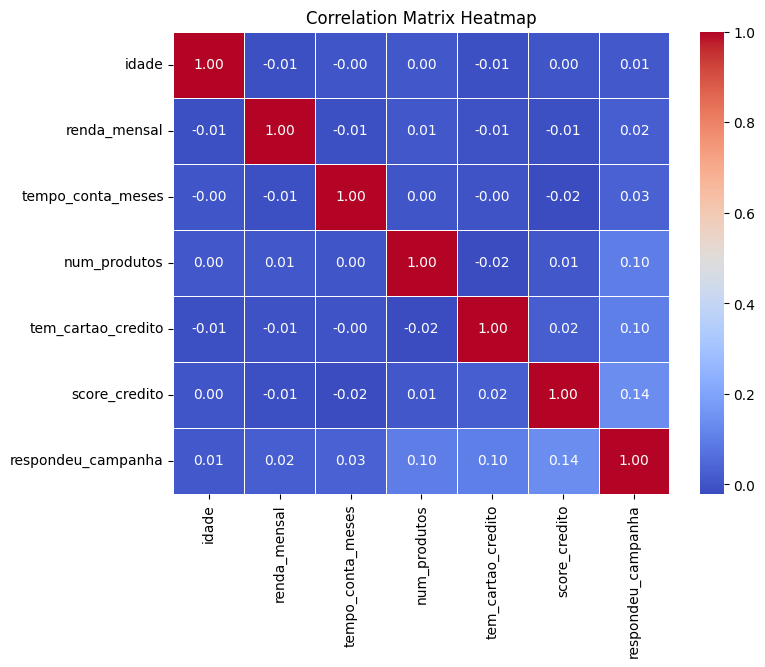

In [19]:
# Cria um heatmap da matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [20]:
# Spearman correlation for non-linear relationships
spearman_correlation = df.corr(method='spearman')
print("\nSpearman Correlation Matrix:")
print(spearman_correlation)


Spearman Correlation Matrix:
                       idade  renda_mensal  tempo_conta_meses  num_produtos  \
idade               1.000000     -0.010861          -0.000279      0.003908   
renda_mensal       -0.010861      1.000000          -0.011004      0.005858   
tempo_conta_meses  -0.000279     -0.011004           1.000000      0.000055   
num_produtos        0.003908      0.005858           0.000055      1.000000   
tem_cartao_credito -0.009472     -0.006197          -0.001164     -0.016421   
score_credito       0.002446     -0.011877          -0.019941      0.005672   
respondeu_campanha  0.009971      0.022121           0.030823      0.097039   

                    tem_cartao_credito  score_credito  respondeu_campanha  
idade                        -0.009472       0.002446            0.009971  
renda_mensal                 -0.006197      -0.011877            0.022121  
tempo_conta_meses            -0.001164      -0.019941            0.030823  
num_produtos                 -0.0

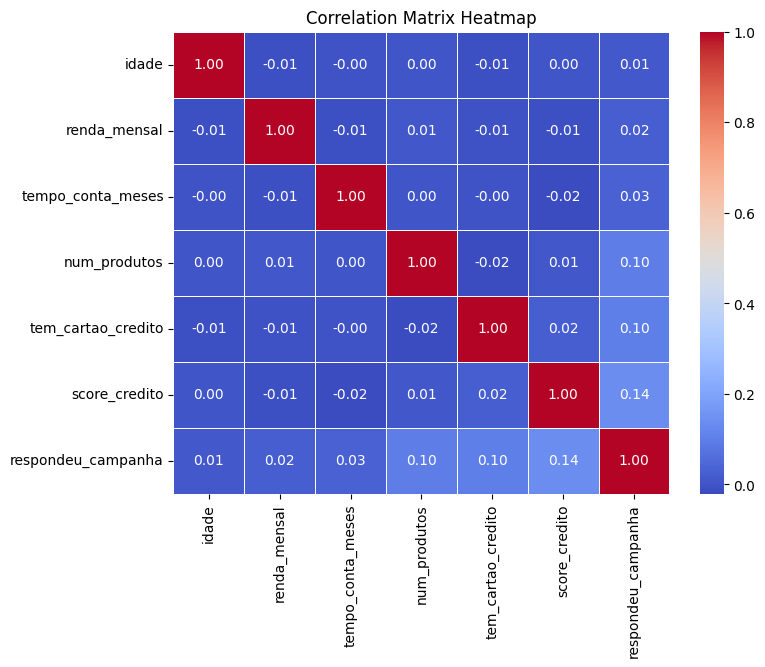

In [21]:
# Cria um heatmap da matriz de correlação Spearman
plt.figure(figsize=(8, 6))
sns.heatmap(spearman_correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()